In [3]:
from scipy.maxentropy import model

ModuleNotFoundError: No module named 'scipy.maxentropy'

In [2]:
import scipy

In [5]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import maxentropy

In [38]:
s = np.arange(6) + 1

def f0(x):
    return x

f = [f0]

In [39]:
model = maxentropy.Model(f, s)
model.verbose = True

In [40]:
model.avegtol

1e-07

In [43]:
# Now set the desired feature expectations
K = [3.5]

# Fit the model
model.fit(K)

Function eval # 141
  dual is  1.9846300362256937
Grad eval #136
  norm of gradient = 0.9999999999789289
Function eval # 142
  dual is  2.3108919057604806
Grad eval #137
  norm of gradient = 1.499020847105169
Function eval # 143
  dual is  1.792014928388545
Grad eval #138
  norm of gradient = 0.03859970217618525
Iteration # 4
Function eval # 144
  dual is  1.792014928388545
Function eval # 145
  dual is  1.7926974829977853
Grad eval #139
  norm of gradient = 0.07394925987742873
Function eval # 146
  dual is  1.7917594692303505
Grad eval #140
  norm of gradient = 3.6592105518984397e-06
Iteration # 5
Function eval # 147
  dual is  1.7917594692303505
Function eval # 148
  dual is  1.7917594692364875
Grad eval #141
  norm of gradient = 7.013486891249698e-06
Function eval # 149
  dual is  1.7917594692280552
Grad eval #142
  norm of gradient = 3.2934099891690494e-11
Iteration # 6
Function eval # 150
  dual is  1.7917594692280552
Optimization terminated successfully.
         Current function

In [44]:
model.params

array([1.12918571e-11])

In [45]:
print("\nFitted model parameters are:\n" + str(model.params))
print("The fitted distribution is:")
model.showdist()


Fitted model parameters are:
[1.12918571e-11]
The fitted distribution is:
	x = 1               	p(x) = 0.1667
	x = 2               	p(x) = 0.1667
	x = 3               	p(x) = 0.1667
	x = 4               	p(x) = 0.1667
	x = 5               	p(x) = 0.1667
	x = 6               	p(x) = 0.1667


In [30]:
print()
print("Desired constraints:")
print("\tE(X) = 4.5")
print()
print("Actual expectations under the fitted model:")
print("\t\hat{X} = ", model.expectations())


Desired constraints:
	E(X) = 4.5

Actual expectations under the fitted model:
	\hat{X} =  [1.5]


In [31]:
np.allclose(K, model.expectations())

True

In [32]:
model.params

array([-1.08696375])

In [33]:
model.probdist()

array([0.6637375 , 0.22383809, 0.07548691, 0.02545712, 0.00858513,
       0.00289524])

/Users/mattiasappelgren/miniconda3/envs/probrobnlp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Probability $p(x)$ of each die face $x$')

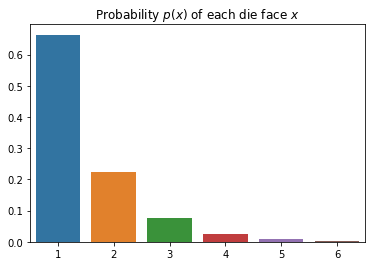

In [34]:
sns.barplot(np.arange(1, 7), model.probdist())
plt.title('Probability $p(x)$ of each die face $x$')

In [26]:
samplespace

array([1, 2, 3, 4, 5, 6])

In [46]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

In [47]:
from itertools import product

samplespace = list(product(['left-handed', 'right-handed'], ['blue-eyed', 'green-eyed']))

In [49]:
samplespace

[('left-handed', 'blue-eyed'),
 ('left-handed', 'green-eyed'),
 ('right-handed', 'blue-eyed'),
 ('right-handed', 'green-eyed')]

In [50]:
def f0(x):
    return x in samplespace

def f1(x):
    return x[1] == 'blue-eyed'

def f2(x):
    return x[0] == 'left-handed'

f = [f0, f1, f2]

# Now set the desired feature expectations
K = [1., 1./3, 1./4]

In [70]:
model = maxentropy.Model(f, samplespace, vectorized=False)
model.verbose = True

In [71]:
model.fit(K)

Function eval # 0
  dual is  1.3862943611198906
Grad eval #0
  norm of gradient = 0.3004626062886658
Function eval # 1
  dual is  1.3072770335340367
Grad eval #1
  norm of gradient = 0.22566949712627374
Function eval # 2
  dual is  1.199377068150267
Grad eval #2
  norm of gradient = 0.01426250945857896
Iteration # 0
Function eval # 3
  dual is  1.199377068150267
Function eval # 4
  dual is  1.1991934428962512
Grad eval #3
  norm of gradient = 0.011490042511728577
Function eval # 5
  dual is  1.1988505019969886
Grad eval #4
  norm of gradient = 0.0006753103915259268
Iteration # 1
Function eval # 6
  dual is  1.1988505019969886
Function eval # 7
  dual is  1.1988500898416308
Grad eval #5
  norm of gradient = 0.0005453929276967377
Function eval # 8
  dual is  1.19884931862867
Grad eval #6
  norm of gradient = 4.756860613626983e-05
Iteration # 2
Function eval # 9
  dual is  1.19884931862867
Function eval # 10
  dual is  1.1988493165913283
Grad eval #7
  norm of gradient = 3.809852053056005

In [72]:
print("Actual expectations under the fitted model:")
print("\t\hat{X} = ", model.expectations())

Actual expectations under the fitted model:
	\hat{X} =  [1.         0.33333333 0.25      ]


In [74]:
model.probdist()

array([0.08333333, 0.16666667, 0.25      , 0.5       ])

In [78]:
from scipy.stats import entropy

In [79]:
def kangaroo_prob_matrix(x):
    assert 0 <= x <= 0.25
    p = np.zeros((2, 2))
    p[0, 0] = x
    p[0, 1] = 1/3 - x
    p[1, 0] = 1/4 - x
    p[1, 1] = 5/12 + x
    return p

In [80]:
kangaroo_prob_matrix(0.2)


array([[0.2       , 0.13333333],
       [0.05      , 0.61666667]])

In [81]:
params = np.linspace(0, 0.25, num=100)
entropies = [entropy(kangaroo_prob_matrix(x).flatten()) for x in params]

In [88]:
x_opt = params[np.argmax(entropies)]
x_opt

0.08333333333333334

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

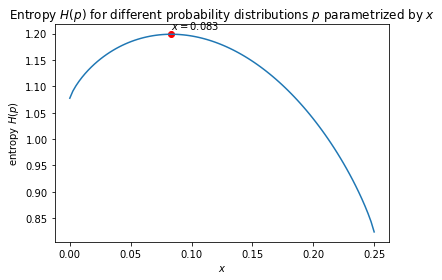

In [89]:

plt.plot(params, entropies)
plt.xlabel('$x$')
plt.ylabel('entropy $H(p)$')
plt.scatter(x_opt, np.max(entropies), color='red')
plt.text(x_opt, np.max(entropies)+0.01, f'$x={x_opt:.3f}$')
plt.title('Entropy $H(p)$ for different probability distributions $p$ parametrized by $x$');

In [90]:
from itertools import product

samplespace = list(product(['left-handed', 'right-handed'], ['blue-eyed', 'green-eyed']))

In [91]:
def f0(x):
    return x in samplespace

def f1(x):
    return x[1] == 'blue-eyed'

def f2(x):
    return x[0] == 'left-handed'

f = [f0, f1, f2]

In [96]:
from maxentropy import MinDivergenceModel
model = maxentropy.Model(f, samplespace, vectorized=False, verbose=False)

In [97]:
model.F.A

array([[1., 1., 1., 1.],
       [1., 0., 1., 0.],
       [1., 1., 0., 0.]])

In [98]:
K = np.array([1., 1./3, 1./4]).reshape(1, 3)

In [99]:
model.fit(K)

In [100]:
model.F.todense()

matrix([[1., 1., 1., 1.],
        [1., 0., 1., 0.],
        [1., 1., 0., 0.]])

In [101]:
model.params

array([ 0.        , -0.69314717, -1.0986123 ])

In [102]:
model.probdist()

array([0.08333333, 0.16666667, 0.25      , 0.5       ])

In [104]:
print("\nFitted model parameters are:\n" + str(model.params))
print("The fitted distribution is:")
model.show()


Fitted model parameters are:
[ 0.         -0.69314717 -1.0986123 ]
The fitted distribution is:
	x = ('left-handed', 'blue-eyed') 	p(x) = 0.0833
	x = ('left-handed', 'green-eyed') 	p(x) = 0.1667
	x = ('right-handed', 'blue-eyed') 	p(x) = 0.2500
	x = ('right-handed', 'green-eyed') 	p(x) = 0.5000


In [105]:
model.expectations()

array([1.        , 0.33333333, 0.25      ])

In [106]:
postcodes_by_state = dict((
    ('Australian Capital Territory', set(range(2600, 2620)) | set(range(2900, 2920))),
    ('New South Wales', set(range(2000, 3000)) - set(range(2600, 2620)) - set(range(2900, 2920))),
    ('Victoria', set(range(3000, 4000))),
    ('Queensland', set(range(4000, 5000))),
    ('South Australia', set(range(5000, 5800))),
    ('Western Australia', set(range(6000, 6798))),
    ('Tasmania', set(range(7000, 7800))),
    ('Northern Territory', set(range(800, 900)))
))

In [107]:
import pandas as pd

In [110]:
def fetch_state_populations():
    url = 'http://www.ausstats.abs.gov.au/Ausstats/subscriber.nsf/0/D52DEAAFCEDF7B2ACA2580EB00133359/$File/31010do001_201609.xls'

    state_populations = pd.read_excel(url, sheet_name='Table_8', skiprows=6,
                  names=['State', 'Population', '%'])

    state_populations.set_index('State', inplace=True)

    drop_row_idx = list(state_populations.index).index('Other Territories')

    state_populations.drop(state_populations.index[drop_row_idx:], inplace=True)

    state_populations['Population'] = state_populations['Population'].astype(int)
    # state_populations.to_hdf('state_populations.h5', key='populations')
    return state_populations

In [111]:
state_populations = fetch_state_populations()


In [112]:
state_populations

,Population,%
State,,
New South Wales,7757843,32.0
Victoria,6100877,25.2
Queensland,4860448,20.1
South Australia,1710804,7.1
Western Australia,2623164,10.8
Tasmania,519783,2.1
Northern Territory,245657,1.0
Australian Capital Territory,398349,1.6


In [113]:
state_populations['%'].sum()

99.9

In [114]:
def prior_state(state):
    return state_populations['%'].loc[state] / 100

In [115]:
prior_state('New South Wales')

0.32

In [116]:
all_states = list(state_populations.index)
all_states

['New South Wales',
 'Victoria',
 'Queensland',
 'South Australia',
 'Western Australia',
 'Tasmania',
 'Northern Territory',
 'Australian Capital Territory']

In [131]:
def prior_postcode(postcode):
    return sum([prior_postcode_given_state(postcode, state) * prior_state(state) for state in all_states])

In [132]:
def prior_postcode_given_state(postcode, state):
    postcodes = postcodes_by_state[state]
    return 1/len(postcodes) if postcode in postcodes else 0

In [133]:
prior_postcode_given_state(3122, 'Victoria')

0.001

In [134]:
prior_postcode_mine(3122)

0.000252

In [135]:
import numpy as np
samplespace = np.arange(10000, dtype=np.uint16)

In [136]:
samplespace

array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=uint16)

In [137]:
def is_valid(postcodes):
    return [200 <= postcode < 10000 for postcode in postcodes]

In [138]:
def in_given_state(state):
    def in_state(postcodes):
        return [postcode in postcodes_by_state[state] for postcode in postcodes]
    return in_state

In [139]:
state_populations.index

Index(['New South Wales', 'Victoria', 'Queensland', 'South Australia',
       'Western Australia', 'Tasmania', 'Northern Territory',
       'Australian Capital Territory'],
      dtype='object', name='State')

In [140]:
features = [is_valid] + \
           [in_given_state(state) for state in state_populations.index]

In [141]:
features

[<function __main__.is_valid(postcodes)>,
 <function __main__.in_given_state.<locals>.in_state(postcodes)>,
 <function __main__.in_given_state.<locals>.in_state(postcodes)>,
 <function __main__.in_given_state.<locals>.in_state(postcodes)>,
 <function __main__.in_given_state.<locals>.in_state(postcodes)>,
 <function __main__.in_given_state.<locals>.in_state(postcodes)>,
 <function __main__.in_given_state.<locals>.in_state(postcodes)>,
 <function __main__.in_given_state.<locals>.in_state(postcodes)>,
 <function __main__.in_given_state.<locals>.in_state(postcodes)>]

In [143]:
model = maxentropy.Model(features, samplespace, vectorized=True)


In [144]:
pop = state_populations['%'] / 100
pop

State
New South Wales                 0.320
Victoria                        0.252
Queensland                      0.201
South Australia                 0.071
Western Australia               0.108
Tasmania                        0.021
Northern Territory              0.010
Australian Capital Territory    0.016
Name: %, dtype: float64

In [161]:
k = target_expectations = np.r_[0.999, pop.values].reshape(1, -1)

In [146]:
target_expectations

array([[0.999, 0.32 , 0.252, 0.201, 0.071, 0.108, 0.021, 0.01 , 0.016]])

In [149]:
len(features) == target_expectations.shape[1]

True

In [150]:
model.fit(target_expectations)

In [151]:
model.expectations() - target_expectations

array([[-9.31964403e-07, -1.72357784e-05,  1.85636911e-05,
         3.42262833e-06, -5.26970558e-06,  4.21062136e-06,
        -1.07885983e-06, -2.54384300e-06, -2.43560157e-06]])

In [152]:
model.probdist()

array([5.00465982e-06, 5.00465982e-06, 5.00465982e-06, ...,
       3.33538598e-10, 3.33538598e-10, 3.33538598e-10])

In [153]:
p = model.probdist()
np.argsort(p)[::-1]

array([2913, 2608, 2601, ..., 8838, 8839, 9999])

In [154]:
%matplotlib inline

In [155]:
import matplotlib.pyplot as plt


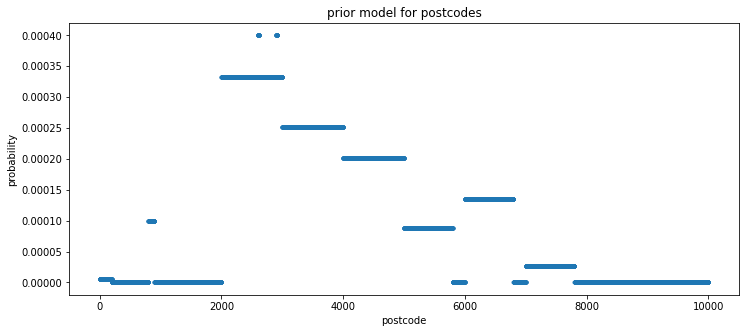

In [156]:
fig, axes = plt.subplots(1, figsize=(12, 5))
plt.plot(samplespace, p, '.', )
axes.set_xlabel('postcode')
axes.set_ylabel('probability')
plt.title('prior model for postcodes');

In [157]:
CBD_POSTCODES = {2000, 2001, 3000, 3001, 4000, 4001, 5000, 5001, 6000, 6001}

In [158]:
def in_cbd(postcodes):
    return [postcode in CBD_POSTCODES for postcode in postcodes]

In [159]:
features2 = features + [in_cbd]

In [162]:
k2 = np.c_[k, 0.25]

In [163]:
k2

array([[0.999, 0.32 , 0.252, 0.201, 0.071, 0.108, 0.021, 0.01 , 0.016,
        0.25 ]])

In [164]:
model2 = maxentropy.Model(features2, samplespace, vectorized=True)

In [165]:
model2.fit(k2)

In [166]:
p2 = model2.probdist()

Text(0, 0.5, 'probability')

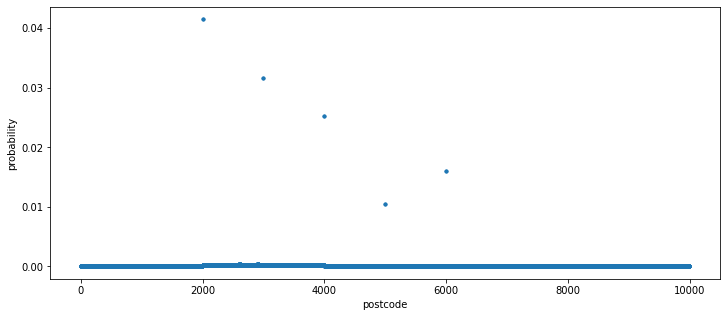

In [167]:
fig, axes = plt.subplots(1, figsize=(12, 5))
plt.plot(samplespace, p2, '.', )
axes.set_xlabel('postcode')
axes.set_ylabel('probability')

Text(0, 0.5, 'probability')

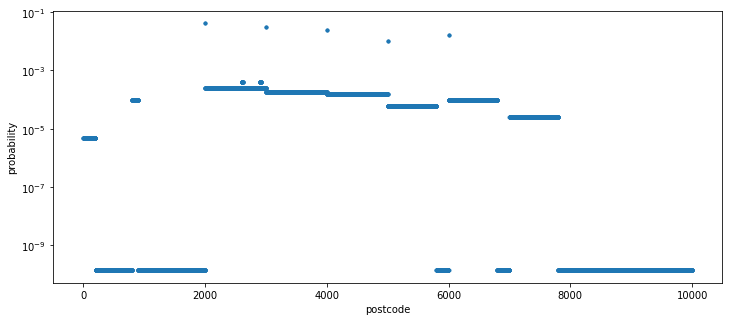

In [168]:
fig, axes = plt.subplots(1, figsize=(12, 5))
plt.semilogy(samplespace, p2, '.', )
axes.set_xlabel('postcode')
axes.set_ylabel('probability')

In [169]:
import numpy as np
import maxentropy

In [170]:
def f0(x):
    return x in samplespace

def f1(x):
    return x=='dans' or x=='en'

def f2(x):
    return x=='dans' or x=='à'

In [171]:
features = [f0, f1, f2]

samplespace = ['dans', 'en', 'à', 'au cours de', 'pendant']

# Now set the desired feature expectations
target_expectations = [1.0, 0.3, 0.5]

X = np.atleast_2d(target_expectations)

In [173]:
smallmodel = maxentropy.Model(features, samplespace,
                                           vectorized=False,
                                           verbose=False)

In [174]:
smallmodel.fit(X)

In [175]:
assert np.allclose(X[0, :], smallmodel.expectations())

In [176]:
p = smallmodel.probdist()
assert np.isclose(p.sum(), target_expectations[0])
assert np.isclose(p[0] + p[1], target_expectations[1])
assert np.isclose(p[0] + p[2], target_expectations[2])

In [177]:
print("\nFitted model parameters are:\n" + str(smallmodel.params))
print("\nFitted distribution is:")
for j, x in enumerate(smallmodel.samplespace):
    print(f"\tx = {x:15s}: p(x) = {p[j]:.4f}")


Fitted model parameters are:
[ 6.88841437e-16 -5.24869398e-01  4.87527722e-01]

Fitted distribution is:
	x = dans           : p(x) = 0.1859
	x = en             : p(x) = 0.1141
	x = à              : p(x) = 0.3141
	x = au cours de    : p(x) = 0.1929
	x = pendant        : p(x) = 0.1929


In [178]:
print()
print("Desired constraints:")
print("\tp['dans'] + p['en'] = 0.3")
print("\tp['dans'] + p['à']  = 0.5")
print()
print("Actual expectations under the fitted model:")
print("\tp['dans'] + p['en'] =", p[0] + p[1])
print("\tp['dans'] + p['à']  =", p[0] + p[2])


Desired constraints:
	p['dans'] + p['en'] = 0.3
	p['dans'] + p['à']  = 0.5

Actual expectations under the fitted model:
	p['dans'] + p['en'] = 0.2999999977092281
	p['dans'] + p['à']  = 0.49999999652678284
